In [1]:
import pandas as pd

train_df = pd.read_csv("/kaggle/input/project-3-ai-ml-core/train.csv")
test_df = pd.read_csv("/kaggle/input/project-3-ai-ml-core/test.csv")
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train = train_df['label'].values
X_train = train_df.drop(columns = 'label').values
X_test = test_df.values

split = int(0.8 * len(X_train))

X_train_split = X_train[:split]
X_val = X_train[split:]
y_train_split = y_train[:split]
y_val = y_train[split:]

print(len(X_train_split))
print(len(X_val))
print(len(y_train_split))
print(len(y_val))

X_train_normalized = X_train_split.reshape(-1, 28, 28) / 255.0
X_val_normalized = X_val.reshape(-1, 28, 28) / 255.0
test_normalized = X_test.reshape(-1, 28, 28) / 255.0

33600
8400
33600
8400


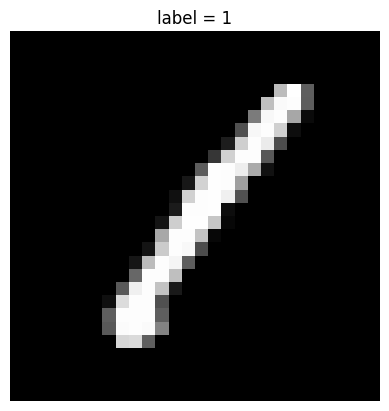

In [4]:
import matplotlib.pyplot as plt

def view_digits(image_array, label=None):
    plt.imshow(image_array, cmap='gray')
    if label is not None:
        plt.title(f"label = {label}")
    plt.axis('off');
    plt.show()

view_digits(X_train_normalized[0], y_train[0])

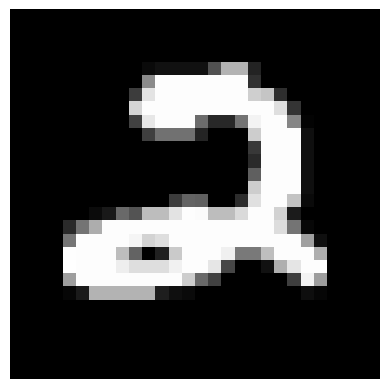

In [5]:
view_digits(test_normalized[0])

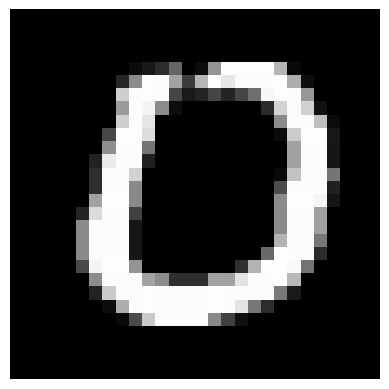

In [6]:
view_digits(X_val_normalized[0])

In [9]:
import numpy as np

np.random.seed(42)

input_size = 784
hidden_size = 128
output_size = 10

w1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

w2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [10]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims = True))
    return e_x / np.sum(e_x, axis=1, keepdims = True)

In [11]:
def forward(x):
    z1 = np.dot(x, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    return softmax(z2)

In [12]:
def crossentropy_loss(y_true, y_pred):
    N = y_true.shape[0]
    y_pred = np.clip(y_pred, 1e-12, 1. - 1e-12)
    loss = -np.sum(y_true * np.log(y_pred)) / N
    return loss

In [13]:
def d_relu(x):
    return (x > 0).astype(float)

def back_prop(X, y_true, y_pred, z1, a1):
    N = X.shape[0]

    d_z2 = y_pred - y_true
    d_w2 = np.dot(a1.T, d_z2) / N
    d_b2 = np.sum(d_z2, axis = 0, keepdims = True) / N

    d_a1 = np.dot(d_z2, w2.T)
    d_z1 = d_a1 * d_relu(z1)
    d_w1 = np.dot(X.T, d_z1) / N
    d_b1 = np.sum(d_z1, axis = 0, keepdims = True) / N

    return d_w1, d_b1, d_w2, d_b2

In [14]:
learning_rate = 0.1
epochs = 10
batch_size = 100

for epoch in range(epochs):
    for i in range(0, len(X_train_normalized), batch_size):
        start = i
        end = min(i + batch_size, len(X_train_normalized))
        X_batch = X_train_normalized[start:end]
        y_batch = y_train[start:end]

        if X_batch.shape[0] == 0:
            continue

        X_batch = X_batch.reshape(X_batch.shape[0], -1)
        y_batch_one_hot = np.eye(10)[y_batch]

        z1 = np.dot(X_batch, w1) + b1
        a1 = relu(z1)
        z2 = np.dot(a1, w2) + b2
        y_pred = softmax(z2)

        loss = crossentropy_loss(y_batch_one_hot, y_pred)

        d_w1, d_b1, d_w2, d_b2 = back_prop(X_batch, y_batch_one_hot, y_pred, z1, a1)

        w1 -= learning_rate * d_w1
        b1 -= learning_rate * d_b1
        w2 -= learning_rate * d_w2
        b2 -= learning_rate * d_b2

    print(f'''Epoch = {epoch+1}/{epochs}
                Loss =  {loss:.4f}''')


Epoch = 1/10
                Loss =  0.5711
Epoch = 2/10
                Loss =  0.4621
Epoch = 3/10
                Loss =  0.3984
Epoch = 4/10
                Loss =  0.3511
Epoch = 5/10
                Loss =  0.3153
Epoch = 6/10
                Loss =  0.2851
Epoch = 7/10
                Loss =  0.2589
Epoch = 8/10
                Loss =  0.2342
Epoch = 9/10
                Loss =  0.2135
Epoch = 10/10
                Loss =  0.1949


In [15]:
X_test_flat = test_normalized.reshape(test_normalized.shape[0], -1)

def predict(X):
    z1 = np.dot(X, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    y_pred = softmax(z2)
    return np.argmax(y_pred, axis=1)

test_preds = predict(X_test_flat)

In [16]:
import pandas as pd

submission = pd.DataFrame({
    'ImageId': np.arange(1, len(test_preds) + 1),
    'Label': test_preds
})

submission.to_csv('my_submission.csv', index=False)